# Evaluation of embedding algorithms

This is notebook for comparison of following embedding algorithms:
*   DeepWalk
*   LINE
*   Node2Vec
*   SDNE
*   Struc2Vec

If you want to know more about these algorithms, please refer to the pages dedicated for each of them linked here:
https://github.com/shenweichen/GraphEmbedding

## Methods of comparison
We provide tests for the mentioned above algorithms 

*  Running embedding algorithms for the same known network (zachary's karate club network) and comparing visually node locations to the input graph
*  Time comparson






# Before you run the code

Please check if you have uploaded reference.rar from our github repo to *content* directory 

In [19]:
!unrar x reference.rar "/content"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from reference.rar


Would you like to replace the existing file /content/reference/embeddings/ge/alias.py
  1261 bytes, modified on 2020-10-18 09:32
with a new one
  1261 bytes, modified on 2020-10-18 09:32

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit a

Extracting  /content/reference/embeddings/ge/alias.py                      1%  OK 
Extracting  /content/reference/embeddings/ge/models/node2vec.py            3%  OK 
Extracting  /content/reference/embeddings/ge/models/sdne.py                8%  OK 
Extracting  /content/reference/embeddings/ge/models/__pycache__/line.cpython-37.pyc      15%  OK 
Extracting  /content/reference/embeddings/ge/models/__pycache__/__init__.cpython-37.pyc      16%  OK 
Extracting  /content/reference/embeddings/ge/models/__pycache__/deepwalk.cpython-37.pyc      19%  OK 
Extracting  /content/reference/embeddings/ge/models/__pyc

## Libraries and dependencies

Installing libraries and dependencies

In [20]:
from reference.embeddings import *
import gensim
import networkx as nx
import joblib
import fastdtw
import tqdm
import numpy as np 
import sklearn
import pandas
import matplotlib

from reference.embeddings.ge.classify import read_node_label, Classifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE
import time

# ALGORITHMS 
from reference.embeddings.ge.models import DeepWalk
from reference.embeddings.ge.models import LINE
from reference.embeddings.ge.models import Node2Vec
from reference.embeddings.ge.models import SDNE
from reference.embeddings.ge.models import Struc2Vec

## Function for writing embeddings into file

In [21]:
import csv
from __future__ import print_function

def write_embeddings(filename="FILENAME.txt"):
  
  f = open(filename, 'w')
  writer = csv.writer(f,delimiter=' ')

  M = []
  for key,values in embeddings.items():
    L = []
    L.append(key)
    for value in values:
      L.append(value)
    M.append(L)

  strig = ''

  for m in M:
    writer.writerow(m)

  f.close()

## t-SNE algorithm for dimensions reduction and plotting in matplotlib


In [22]:
from sklearn.manifold import TSNE
def makeTsneAndPrint(filename="hejeczka.txt",algorithm="embedding Algo"):
  # extracting data without id's
  File_data = np.genfromtxt(filename, dtype=float,invalid_raise = False,usecols=np.arange(1, 65))

  # extracting id's from source file
  as_labels = np.genfromtxt(filename, dtype=float,invalid_raise = False,usecols=np.arange(0, 1))

  # making embeddings 
  embedding = TSNE(n_components=2,learning_rate='auto',init='random',early_exaggeration=30).fit_transform(File_data)
  
  counter=1
  for node in embedding:
    print("Node no. ",counter,": ",node)
    counter=counter+1

  # plot limiting
  plt.figure(figsize=(10,10))
  plt.xlim(embedding[:,0].min()-2,embedding[:,0].max() + 2)
  plt.ylim(embedding[:,1].min()-2,embedding[:,1].max() + 2)

  # assigning numbers to points in plot 
  for i in range(len(embedding)):
    plt.text(embedding[i,0],embedding[i,1],str(as_labels[i]),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center",bbox = dict(boxstyle=f"circle,pad={0.25}", fc="lightgrey"))

  title = "Autonomous Systems Embeddings for: " + str(algorithm)
    # plotting
  plt.xlabel(' t-SNE 1st coordinate',fontweight="bold")
  plt.ylabel(' t-SNE 2nd coordinate', fontweight="bold")
  plt.title(title ,fontweight="bold")
  plt.ion()
  plt.show()

## Visualizing Zachary Karate Network Club network

This is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.

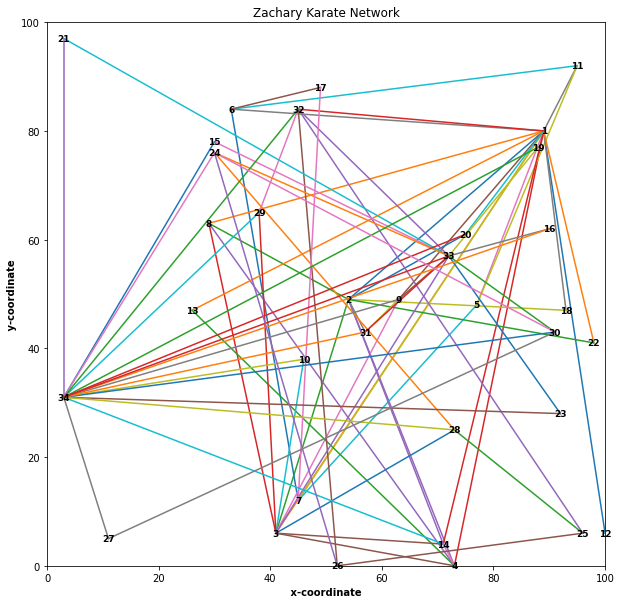

In [23]:
# Connections plotting

import matplotlib.pyplot as plt
import random 
graph = nx.read_edgelist('reference/data/wiki/zachary_karate_list.txt.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])# Read graph
plt.figure(figsize=(10,10))
plt.xlim(0,100)
plt.ylim(0,100)

node_list = {}

# randomizing AS locations in map
for i in graph.nodes:
  x_random = random.randint(0,100)
  y_random = random.randint(0,100)
  node_list[i]= ([x_random,y_random])  
  plt.text(x_random,y_random,str(i),fontdict={'weight': 'bold', 'size': 9},ha="center", va="center")

# Looking for edges
for j in graph.edges:
  plt.plot([node_list[j[0]][0],node_list[j[1]][0]],[node_list[j[0]][1],node_list[j[1]][1]])

plt.title('Autonomous Systems Connections (distances irrelevant - randomized)',fontweight="bold")

print()
print()

plt.xlabel(' x-coordinate ',fontweight="bold")
plt.ylabel(' y-coordinate ', fontweight="bold")
plt.title('Zachary Karate Network')
plt.show()

Structure comparison between embedding algorithms
- LINE
- Deepwalk
- Node2Vec
- Struc2Vec
- SDNE

Dataset in "Wiki_EdgeList" is zachary karate Network. It's description is available here:
https://networkrepository.com/soc-karate.php

## Deepwalk 

/content
archive.rar   LINE.txt	    reference	   sample_data	  temp_struc2vec
Deepwalk.txt  Node2Vec.txt  reference.rar  Struc2Vec.txt
archive.rar   LINE.txt	    reference	   sample_data	  temp_struc2vec
Deepwalk.txt  Node2Vec.txt  reference.rar  Struc2Vec.txt
Learning embedding vectors...
Learning embedding vectors done!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Node no.  1 :  [-8.882005 -6.606856]
Node no.  2 :  [-8.847702  -6.6680083]
Node no.  3 :  [-8.856565  -6.1991725]
Node no.  4 :  [-9.21239  -5.665596]
Node no.  5 :  [-8.848423  -5.0714064]
Node no.  6 :  [-8.930237 -5.510897]
Node no.  7 :  [-9.529142  -5.3123856]
Node no.  8 :  [-8.334089  -5.0045805]
Node no.  9 :  [-8.746522 -5.072266]
Node no.  10 :  [-8.968631  -5.6281037]
Node no.  11 :  [-9.373474  -5.1539555]
Node no.  12 :  [-8.683603  -4.9495187]
Node no.  13 :  [-8.60446  -4.863328]
Node no.  14 :  [-9.2985325 -5.234975 ]
Node no.  15 :  [-8.57546   -5.1252937]
Node no.  16 :  [-8.845249  -5.0766144]
Node no.  17 :  [-8.984137 -5.751859]
Node no.  18 :  [-9.01786   -5.6519766]
Node no.  19 :  [-8.967182 -4.870103]
Node no.  20 :  [-8.787854 -5.482335]
Node no.  21 :  [-9.344751 -5.131124]
Node no.  22 :  [-8.604876  -5.5101995]
Node no.  23 :  [-8.503309  -5.5757885]
Node no.  24 :  [-9.17714   -5.3219023]
Node no.  25 :  [-9.420289 -5.337939]
Node no.  26 :  [-8.907559 -5

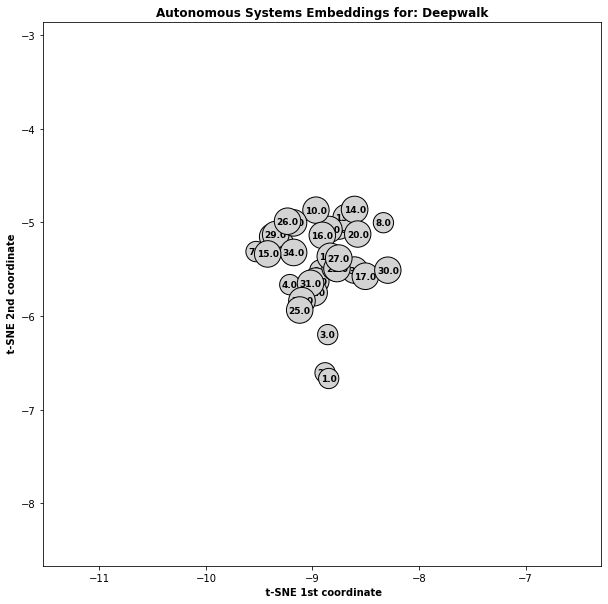

In [24]:
height = []
bars = []
!pwd
!ls
start = time.time()

G = nx.read_edgelist('reference/data/wiki/zachary_karate_list.txt.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])# Read graph
!ls
model = DeepWalk(G,walk_length=10,num_walks=80,workers=1)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Deepwalk")
write_embeddings("Deepwalk.txt")
makeTsneAndPrint("Deepwalk.txt","Deepwalk")

## LINE

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1/1 - 2s - loss: 1.3873 - first_order_loss: 0.6936 - second_order_loss: 0.6938
Epoch 2/50
1/1 - 0s - loss: 1.3912 - first_order_loss: 0.6981 - second_order_loss: 0.6931
Epoch 3/50
1/1 - 0s - loss: 1.3876 - first_order_loss: 0.6949 - second_order_loss: 0.6927
Epoch 4/50
1/1 - 0s - loss: 1.3883 - first_order_loss: 0.6956 - second_order_loss: 0.6928
Epoch 5/50
1/1 - 0s - loss: 1.3900 - first_order_loss: 0.6975 - second_order_loss: 0.6925
Epoch 6/50
1/1 - 0s - loss: 1.3863 - first_order_loss: 0.6944 - second_order_loss: 0.6920
Epoch 7/50
1/1 - 0s - loss: 1.3814 - first_order_loss: 0.6910 - second_order_loss: 0.6904
Epoch 8/50
1/1 - 0s - loss: 1.3901 - first_order_loss: 0.6982 - second_order_loss: 0.6918
Epoch 9/50
1/1 - 0s - loss: 1.3885 - first_order_loss: 0.6963 - second_order_loss: 0.6923
Epoch 10/50
1/1 - 0s - loss: 1.3820 - first_order_loss: 0.6917 - second_order_loss: 0.6903
Epoch 11/50
1/1 - 0s - loss: 1.3838 - first_order_loss: 0.6936 - second_order_loss: 0.6902
Epoch 12

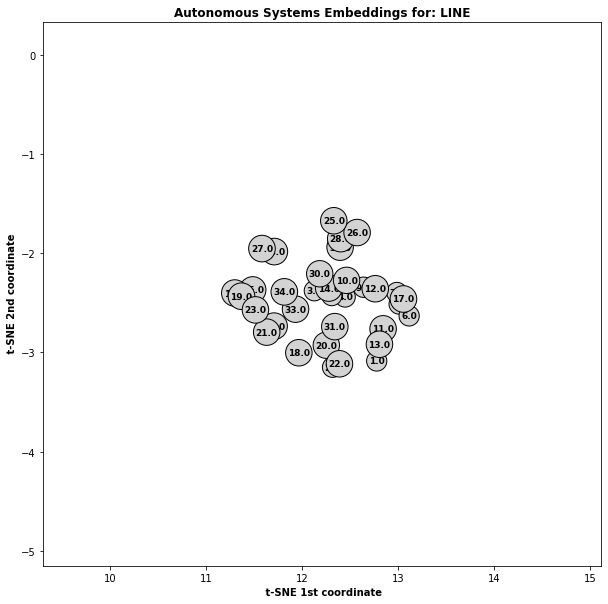

In [25]:
start = time.time()

G = nx.read_edgelist('reference/data/wiki/zachary_karate_list.txt.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = LINE(G,embedding_size=128,order='all') #init model,order can be ['first','second','all']
model.train(batch_size=1024,epochs=50,verbose=2)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("LINE")
write_embeddings("LINE.txt")
makeTsneAndPrint("LINE.txt","LINE")

## Node2Vec

Preprocess transition probs...
Learning embedding vectors...
Learning embedding vectors done!


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Node no.  1 :  [ 3.892458  -1.3009552]
Node no.  2 :  [ 3.9751914 -1.346639 ]
Node no.  3 :  [ 4.0303326 -1.1494467]
Node no.  4 :  [ 3.8196113  -0.36626947]
Node no.  5 :  [ 4.1931252  -0.01774624]
Node no.  6 :  [ 4.1212506 -0.356311 ]
Node no.  7 :  [3.569604   0.00399166]
Node no.  8 :  [ 4.884044   -0.05138642]
Node no.  9 :  [4.3450136  0.21522895]
Node no.  10 :  [ 4.0143785 -0.5193578]
Node no.  11 :  [3.6722512  0.17538816]
Node no.  12 :  [4.4975753  0.23495036]
Node no.  13 :  [4.632983   0.14788498]
Node no.  14 :  [3.8567517  0.17764081]
Node no.  15 :  [ 4.587607   -0.02701418]
Node no.  16 :  [4.3188233  0.04947958]
Node no.  17 :  [ 3.9229472 -0.6716283]
Node no.  18 :  [ 3.9535341  -0.28578767]
Node no.  19 :  [4.212558  0.3878025]
Node no.  20 :  [ 4.262857  -0.3836668]
Node no.  21 :  [ 3.6064649  -0.12765461]
Node no.  22 :  [ 4.3625965  -0.62851715]
Node no.  23 :  [ 4.474003  -0.5657228]
Node no.  24 :  [ 3.803384   -0.12109377]
Node no.  25 :  [ 3.5930748  -0.039

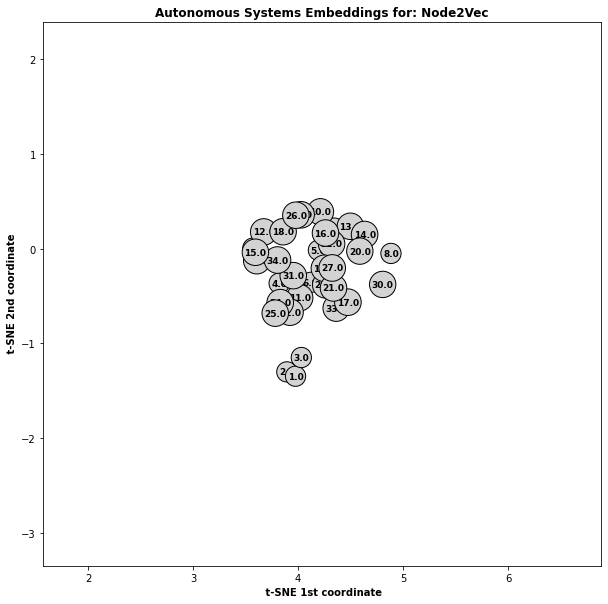

In [26]:
start = time.time()
G=nx.read_edgelist('reference/data/wiki/zachary_karate_list.txt.txt',
                        create_using = nx.DiGraph(), nodetype = None, data = [('weight', int)])#read graph

model = Node2Vec(G, walk_length = 10, num_walks = 80,p = 0.25, q = 4, workers = 1)#init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors
end = time.time()

height.append(end - start)
bars.append("Node2Vec")
write_embeddings("Node2Vec.txt")
makeTsneAndPrint("Node2Vec.txt","Node2Vec")

## Struc2Vec

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   10.2s remaining:   10.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   10.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.4s finished


Learning representation...
Learning representation done!
Node no.  1 :  [2.261177 3.043471]
Node no.  2 :  [2.1632564 2.100751 ]
Node no.  3 :  [1.574576  3.2608266]
Node no.  4 :  [1.1572136 3.091515 ]
Node no.  5 :  [2.2722216 3.0164554]
Node no.  6 :  [2.246995  3.0569866]
Node no.  7 :  [1.3294969 3.1322565]
Node no.  8 :  [1.1410128 2.972267 ]
Node no.  9 :  [1.4128376 3.1876822]
Node no.  10 :  [1.2254167 2.9757338]
Node no.  11 :  [2.2308438 3.091471 ]
Node no.  12 :  [1.4961789 3.2003095]
Node no.  13 :  [1.0952336 2.958563 ]
Node no.  14 :  [1.5507829 3.2193344]
Node no.  15 :  [1.4762872 3.235244 ]
Node no.  16 :  [1.6049954 3.221815 ]
Node no.  17 :  [1.1041906 2.8748126]
Node no.  18 :  [1.4159353 3.615285 ]
Node no.  19 :  [2.303378  3.3254025]
Node no.  20 :  [1.1431458 2.9017906]
Node no.  21 :  [2.3042085 3.3280215]
Node no.  22 :  [0.9772671 2.8123837]
Node no.  23 :  [1.4745101 3.6599634]
Node no.  24 :  [0.91381925 2.8583913 ]
Node no.  25 :  [2.1656394 2.115961 ]
No

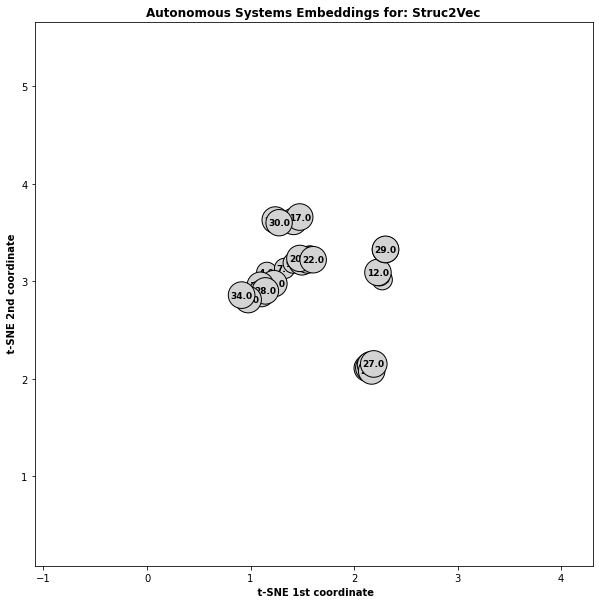

In [27]:
start = time.time()
G = nx.read_edgelist('reference/data/wiki/zachary_karate_list.txt.txt',create_using=nx.DiGraph(),nodetype=None,data=[('weight',int)])#read graph

model = model = Struc2Vec(G, 10, 80, workers=4, verbose=40, ) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

end = time.time()
height.append(end - start)
bars.append("Struc2Vec")
write_embeddings("Struc2Vec.txt")
makeTsneAndPrint("Struc2Vec.txt","Struc2Vec")

Time comparison between embedding algorithms
- LINE
- Node2Vec
- Deepwalk
- Struc2Vec

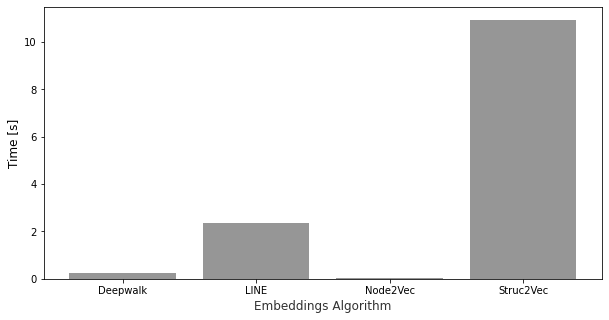

In [28]:
# Make a dataset:
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, height, color = '#969696')
  
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xlabel('Embeddings Algorithm', fontsize=12, color='#323232')
plt.ylabel('Time [s]', fontsize=12)

plt.show()